In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [119]:
df = pd.read_csv('data.csv')
df.head()


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [120]:
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [121]:
#Check any missing value
data = df
data.isna().any()
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [122]:
print(data.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [123]:
data['city-mpg'] = 235 /data['city-mpg']
data.rename(columns = {'city-mpg': "city-L / 100km"}, inplace = True)


data.info()


<class 'pandas.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    str    
 2   make               204 non-null    str    
 3   fuel-type          204 non-null    str    
 4   aspiration         204 non-null    str    
 5   num-of-doors       204 non-null    str    
 6   body-style         204 non-null    str    
 7   drive-wheels       204 non-null    str    
 8   engine-location    204 non-null    str    
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    str    
 15  num-of-cylinders   204 non-null    str    
 16  engine-size        204 non-null    in

In [124]:
data.price.unique()
data = data[data.price != '?']
data['price'] = data['price'].astype(int)
data.dtypes

symboling              int64
normalized-losses        str
make                     str
fuel-type                str
aspiration               str
num-of-doors             str
body-style               str
drive-wheels             str
engine-location          str
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type              str
num-of-cylinders         str
engine-size            int64
fuel-system              str
bore                     str
stroke                   str
compression-ratio    float64
horsepower               str
peak-rpm                 str
city-L / 100km       float64
highway-mpg            int64
price                  int64
dtype: object

In [125]:
data.head(n=10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L / 100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,13.823529,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,10.217391,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,10.217391,29,16925


0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, str): ['Low' < 'Medium' < 'High']


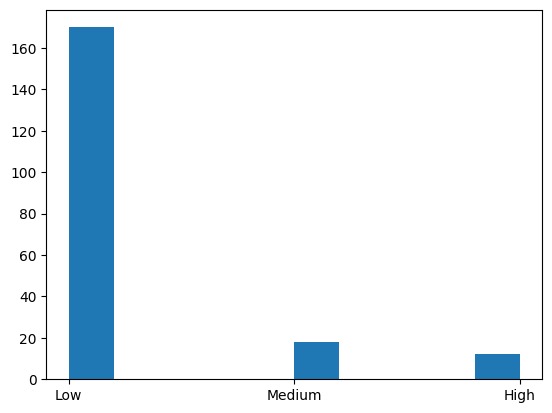

In [126]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [127]:
#Convert fuel type into 0 or 1 binary 
pd.get_dummies(data['fuel-type']).head()

data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


<Axes: xlabel='drive-wheels', ylabel='price'>

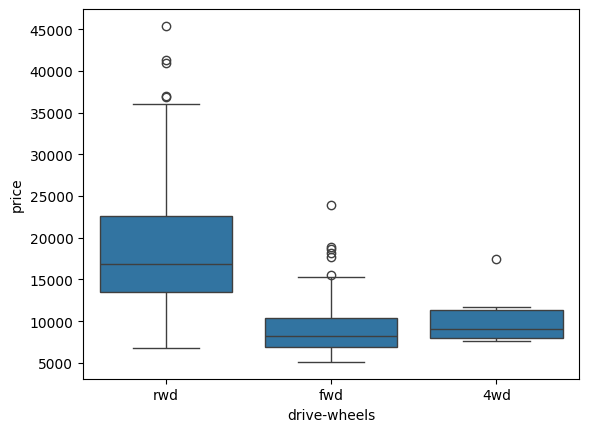

In [128]:
#plt.boxplot(data['price'])
sns.boxplot(x ='drive-wheels', y ='price', data = data)

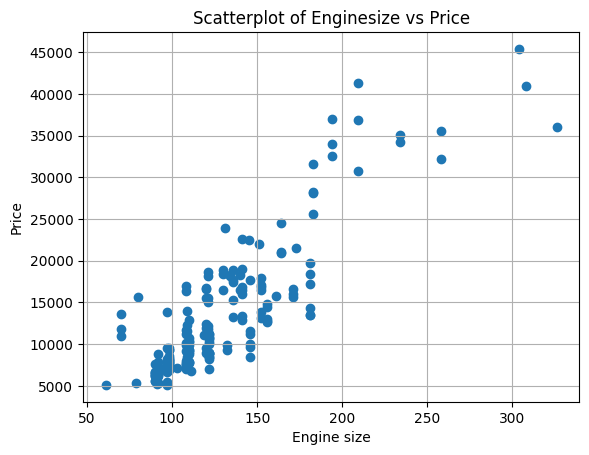

In [129]:



plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [130]:
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], 
                         as_index = False).mean()

data_grp.info

<bound method DataFrame.info of    drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  26563.250000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222>

In [140]:
data_pivot = data_grp.pivot(index='drive-wheels', columns='body-style')

# Optional: Fill missing values with 0 so the heatmap has no empty 'white' holes
data_pivot = data_pivot.fillna(0)

data_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

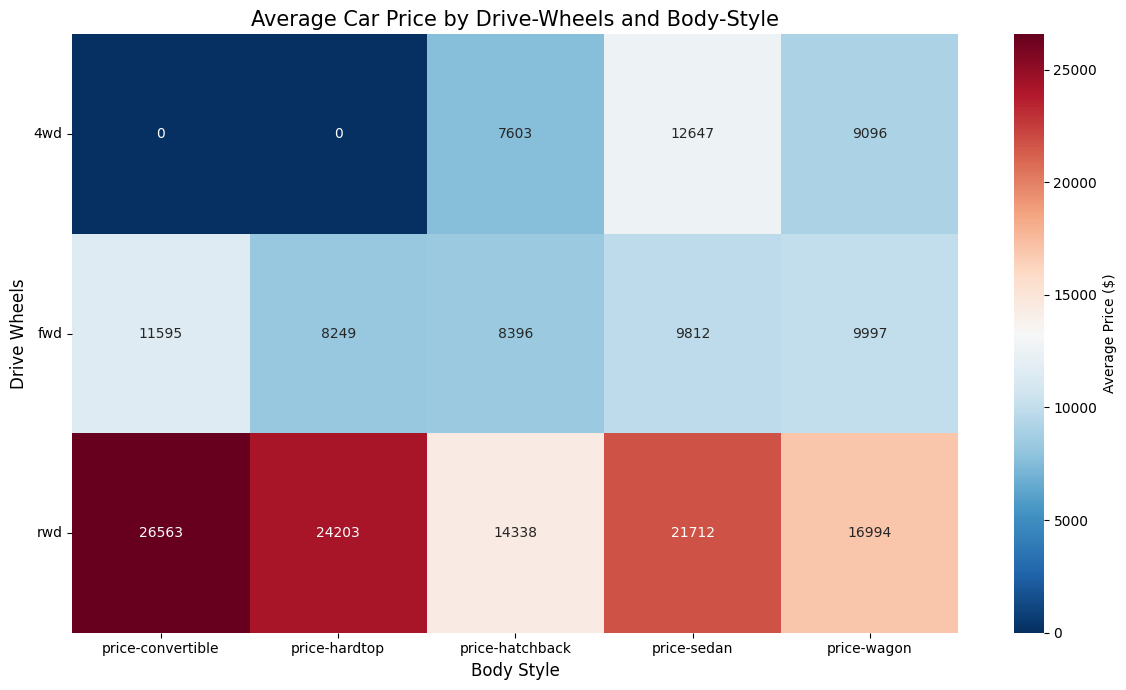

In [143]:
# 1. Set the figure size - making it wider helps the text fit
plt.figure(figsize=(12, 7))

# 2. Create the heatmap
# annot=True puts the numbers inside the boxes
# fmt='.0f' rounds them to whole numbers
sns.heatmap(data_pivot, annot=True, fmt='.0f', cmap='RdBu_r', 
            cbar_kws={'label': 'Average Price ($)'})

# 3. Handle the X-axis (Body Styles)
# rotation=0 makes the text horizontal
plt.xticks(rotation=0, horizontalalignment='center')

# 4. Handle the Y-axis (Drive Wheels)
plt.yticks(rotation=0)

# 5. Add Titles and Labels
plt.title('Average Car Price by Drive-Wheels and Body-Style', fontsize=15)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Drive Wheels', fontsize=12)

# 6. tight_layout ensures nothing gets cut off at the edges
plt.tight_layout()
plt.show()

ANOVA Results (Honda vs Subaru):
F_onewayResult(statistic=np.float64(0.19744030127462608), pvalue=np.float64(0.6609478240622191))


(0.0, 53388.8008965566)

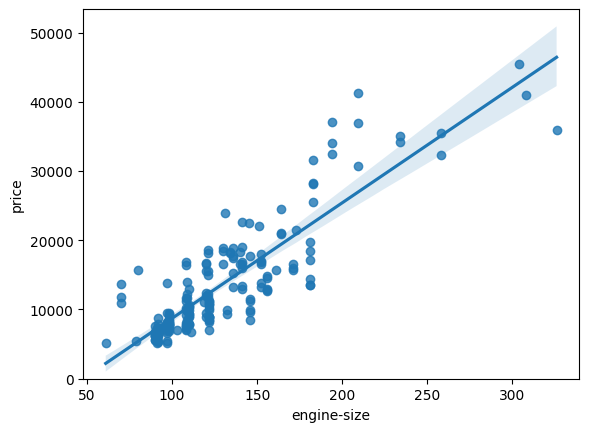

In [197]:
honda_prices = data[data['make'] == 'honda']['price']
subaru_prices = data[data['make'] == 'subaru']['price']

# 3. Perform ANOVA (f_oneway)
# We use .astype(float) to ensure the math doesn't fail on integer types
annova_results_l = sp.stats.f_oneway(honda_prices.astype(float), 
                                  subaru_prices.astype(float))

print("ANOVA Results (Honda vs Subaru):")
print(annova_results_l)

sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )